### IMPORTS AND INITIAL CONFIGURATION

In [1]:
# Data Manipulation
import numpy as np  # Numerical operations and arrays
import pandas as pd # Data structures (DataFrame, Series) and I/O operations

# Visualization
import seaborn as sns           # High-level statistical visualizations
import matplotlib.pyplot as plt # Low-level plotting (seaborn's foundation)

# Configure visualizations
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Display all columns in dataframes
pd.set_option('display.max_columns', None)

# Format float numbers with 2 decimal places
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

print('Libraries loaded and settings applied!')

Libraries loaded and settings applied!


### LOAD THE DATASET

In [2]:
# Load dataset
df = pd.read_csv('../data/sales_dataset.csv')

print(f'Dataset loaded successfully!')
print(f'   - Rows: {df.shape[0]}')
print(f'   - Columns: {df.shape[1]}')

# First look at the data
print(f'\n First 10 rows:')
df.head(10)

Dataset loaded successfully!
   - Rows: 100
   - Columns: 4

 First 10 rows:


,years_of_experience,number_of_sales,seasonal_factor,revenue_in_reais
0,36,21,5,2639.89
1,74,44,10,4707.32
2,38,44,4,5910.04
3,52,62,6,6130.74
4,97,56,2,7516.46
5,67,70,10,1247.88
6,119,69,2,3485.61
7,66,62,2,2773.99
8,68,96,3,4177.92
9,106,42,2,4719.69


### DATA STRUCTURE AND TYPES

In [3]:
print('Dataset Structure:\n')
df.info()

Dataset Structure:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   years_of_experience  100 non-null    int64  
 1   number_of_sales      100 non-null    int64  
 2   seasonal_factor      100 non-null    int64  
 3   revenue_in_reais     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


### MISSING VALUES ANALYSIS

In [4]:
# Check for null/missing values in each column
# isnull() returns True for each missing value
# sum() counts the True values per column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

print('Missing Values Analysis:\n')
print(pd.DataFrame({'missing_count': missing_values, 'missing_percentage': missing_percentage}))

total_missing = missing_values.sum()
if total_missing == 0:
  print('\nNo missing values found! Dataset is complete.')
else:
  print(f'\nTotal missing values: {total_missing}')

Missing Values Analysis:

                     missing_count  missing_percentage
years_of_experience              0                0.00
number_of_sales                  0                0.00
seasonal_factor                  0                0.00
revenue_in_reais                 0                0.00

No missing values found! Dataset is complete.


### DESCRIPTIVE STATISTICS

In [5]:
print('Descriptive Statistics:')
df.describe()

Descriptive Statistics:


,years_of_experience,number_of_sales,seasonal_factor,revenue_in_reais
count,100.00,100.00,100.00,100.00
mean,64.49,54.49,5.82,5112.94
std,32.40,25.31,2.84,2544.73
min,1.00,10.00,1.00,1133.36
25%,38.75,37.50,4.00,2800.66
50%,64.50,52.50,5.00,4953.77
75%,93.00,70.50,8.00,7079.50
max,119.00,100.00,10.00,9941.02


### DISTRIBUTION OF VARIABLES

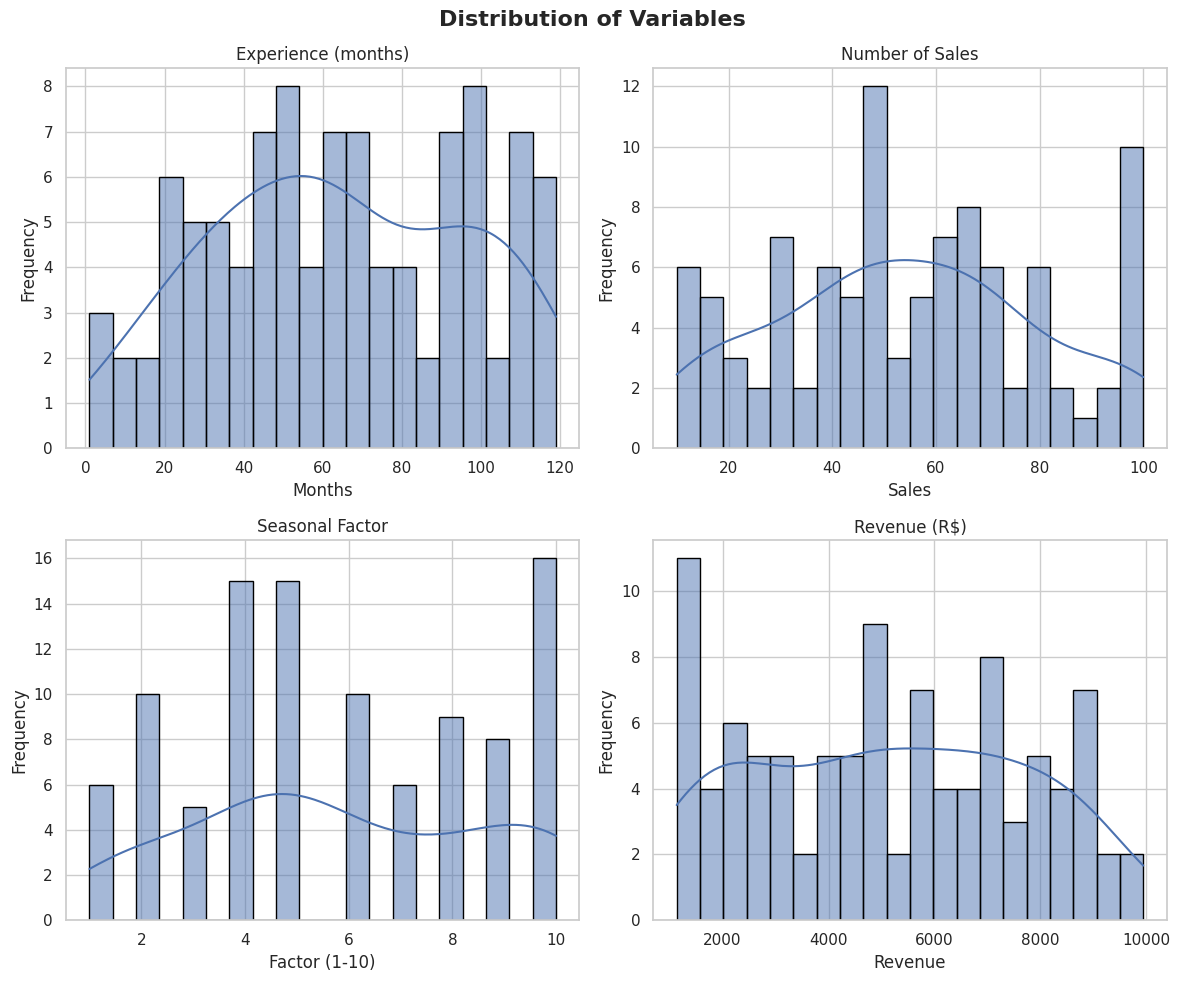

In [6]:
# Create a figure with 4 subplots (2 rows x 2 columns)
# figsize: total figure size
# tight_layout: automatically adjusts spacing between subplots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Variables', fontsize=16, fontweight='bold')

# Histogram + KDE for each variable
# histplot: creates histogram with optional KDE (Kernel Density Estimation)
# KDE: smooth curve that estimates the probability density function
# bins: number of bars in the histogram

# Experience (top-left)
sns.histplot(data=df, x='years_of_experience', kde=True, bins=20, ax=axes[0, 0], edgecolor='black')
axes[0, 0].set_title('Experience (months)')
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Frequency')

# Number of sales (top-right)
sns.histplot(data=df, x='number_of_sales', kde=True, bins=20, ax=axes[0, 1], edgecolor='black')
axes[0, 1].set_title('Number of Sales')
axes[0, 1].set_xlabel('Sales')
axes[0, 1].set_ylabel('Frequency')

# Seasonal factor (bottom-left)
sns.histplot(data=df, x='seasonal_factor', kde=True, bins=20, ax=axes[1, 0], edgecolor='black')
axes[1, 0].set_title('Seasonal Factor')
axes[1, 0].set_xlabel('Factor (1-10)')
axes[1, 0].set_ylabel('Frequency')

# Revenue (bottom-right)
sns.histplot(data=df, x='revenue_in_reais', kde=True, bins=20, ax=axes[1, 1], edgecolor='black')
axes[1, 1].set_title('Revenue (R$)')
axes[1, 1].set_xlabel('Revenue')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### BOXPLOTS FOR OUTLIER DETECTION

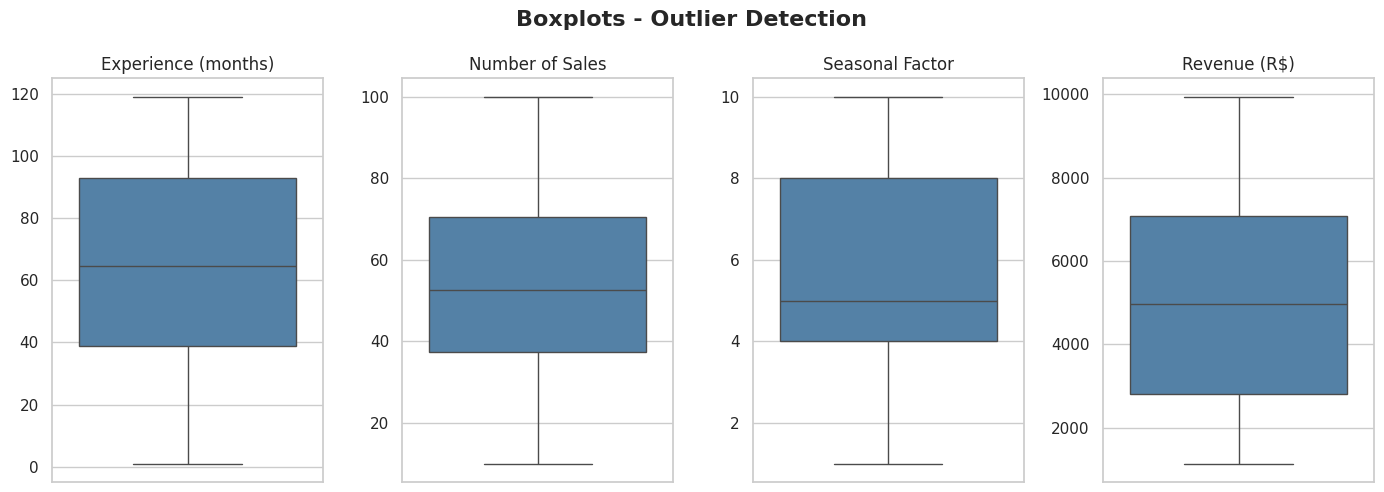

In [7]:
# What is a boxplot? The box shows Q1(25%) to Q3(75%) - this is the IQR
# (InterQuartile Range). The line inside the box is the median (Q2, 50%).
# Whiskers extend to 1.5 * IQR from the box edges. Points beyond whiskers
# are considered outliers (shown as diamonds).

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 5))
fig.suptitle('Boxplots - Outlier Detection', fontsize=16, fontweight='bold')

# List of columns and their display names
columns = ['years_of_experience', 'number_of_sales', 'seasonal_factor', 'revenue_in_reais']
titles = ['Experience (months)', 'Number of Sales', 'Seasonal Factor', 'Revenue (R$)']

# Create a boxplot for each variable
for ax, col, title in zip(axes, columns, titles):
  sns.boxplot(data=df, y=col, ax=ax, color='steelblue')
  ax.set_title(title)
  ax.set_ylabel('')

plt.tight_layout()
plt.show()


### OUTLIER QUANTIFICATION USING IQR METHOD

In [8]:
# IQR Method for outlier detection:
# Lower bound = Q1 - 1.5 * IQR;
# Upper bound = Q3 + 1.5 * IQR;
# Values outside these bounds are considered outliers

def count_outliers(series: pd.Series) -> dict[str, float]:
  """
  Count outliers in a pandas Series using the IQR method.

  Returns:
    A dict with lower bound, upper bound, and outlier count.
  """
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = series[(series < lower_bound) | (series > upper_bound)]

  return {
    'Q1': q1,
    'Q3': q3,
    'IQR': iqr,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,
    'Outlier Count': len(outliers),
    'Outlier %': (len(outliers) / len(series)) * 100
  }

# Apply to all numerical columns
print('Outlier Analysis (IQR Method): \n')

outlier_summary = {}
for col in df.columns:
  outlier_summary[col] = count_outliers(df[col])

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


Outlier Analysis (IQR Method): 

                         Q1      Q3     IQR  Lower Bound  Upper Bound  \
years_of_experience   38.75   93.00   54.25       -42.62       174.38   
number_of_sales       37.50   70.50   33.00       -12.00       120.00   
seasonal_factor        4.00    8.00    4.00        -2.00        14.00   
revenue_in_reais    2800.66 7079.50 4278.84     -3617.60     13497.76   

                     Outlier Count  Outlier %  
years_of_experience           0.00       0.00  
number_of_sales               0.00       0.00  
seasonal_factor               0.00       0.00  
revenue_in_reais              0.00       0.00  


### CORRELATION ANALYSIS

In [9]:
# Correlation measures the linear relationship between two variables. Values range
# from -1 to +1:
# - +1: perfect positive correlation (as X increases, Y increases);
# - 0: no linear correlation;
# - -1: perfect negative correlation (as X increases, Y increases);
#
# For regression, we want features with HIGH correlation to the target.
# Correlation Matrix calculates Pearson correlation coefficient between all pairs of
# variables

correlation_matrix = df.corr()

print('Correlation Matrix: \n')
print(correlation_matrix)

Correlation Matrix: 

                     years_of_experience  number_of_sales  seasonal_factor  \
years_of_experience                 1.00             0.04            -0.18   
number_of_sales                     0.04             1.00            -0.09   
seasonal_factor                    -0.18            -0.09             1.00   
revenue_in_reais                   -0.04             0.08             0.03   

                     revenue_in_reais  
years_of_experience             -0.04  
number_of_sales                  0.08  
seasonal_factor                  0.03  
revenue_in_reais                 1.00  


### CORRELATION HEATMAP

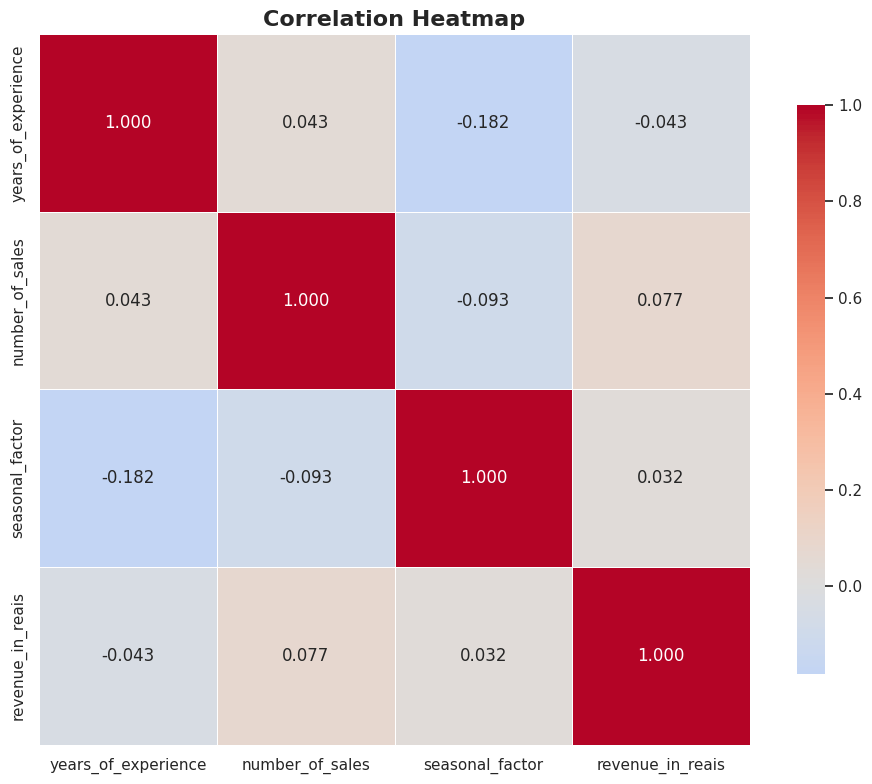

In [11]:
# A heatmap makes it easier to spot strong/weak correlation visually
# - Darker colors = stronger correlation
# - annot=True shows the actual values in each cell

plt.figure(figsize=(10, 8))

sns.heatmap(
  correlation_matrix,
  annot=True,              # Show correlation values
  fmt='.3f',               # Format: 3 decimal places
  cmap="coolwarm",         # Color palette: blue (negative) to red (positive)
  center=0,                # Center the colormap at 0
  square=True,             # Make cells square
  linewidths=0.5,          # Add gridlines
  cbar_kws={'shrink': 0.8} # Colorbar size
)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### SCATTER PLOTS - FEATURES VS TARGET

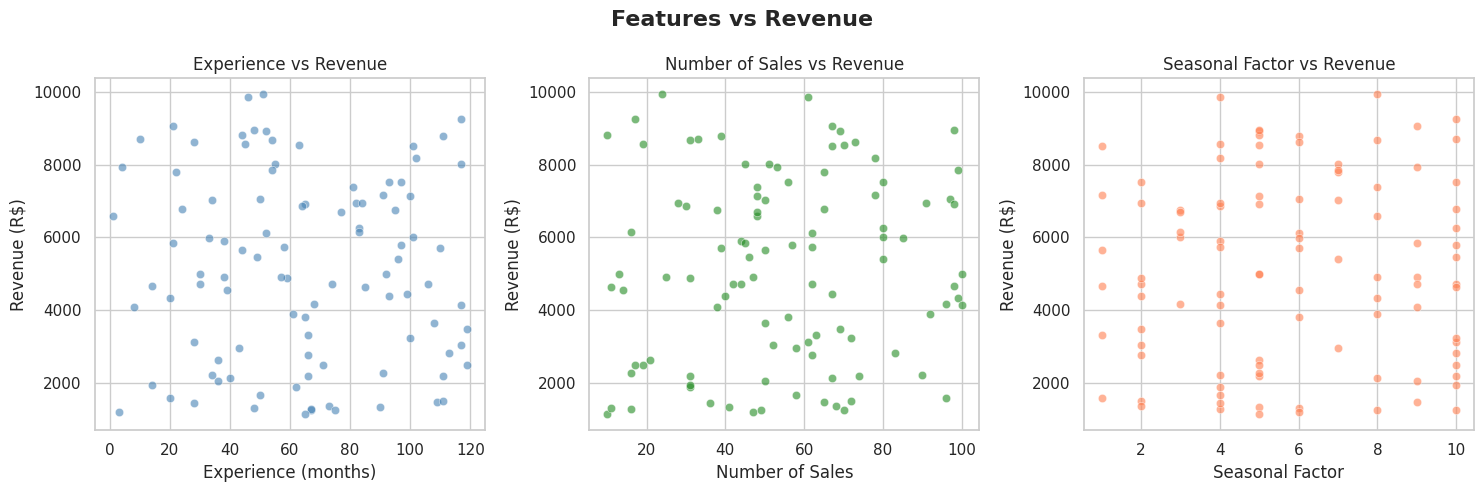

In [15]:
# Scatter plots helps us visualize the relationship between each feature and the
# target, visualize whether the relationship is linear or non-linear, and visualize
# the strength and direction of the relationship

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Features vs Revenue', fontsize=16, fontweight='bold')

# Experience vs Revenue
sns.scatterplot(
  data=df, x='years_of_experience', y='revenue_in_reais',
  ax=axes[0], alpha=0.6, color='steelblue')
axes[0].set_title('Experience vs Revenue')
axes[0].set_xlabel('Experience (months)')
axes[0].set_ylabel('Revenue (R$)')

# Number of Sales vs Revenue
sns.scatterplot(
  data=df, x='number_of_sales', y='revenue_in_reais',
  ax=axes[1], alpha=0.6, color='forestgreen')
axes[1].set_title('Number of Sales vs Revenue')
axes[1].set_xlabel('Number of Sales')
axes[1].set_ylabel('Revenue (R$)')

# Seasonal Factor vs Revenue
sns.scatterplot(
  data=df, x='seasonal_factor', y='revenue_in_reais',
  ax=axes[2], alpha=0.6, color='coral')
axes[2].set_title('Seasonal Factor vs Revenue')
axes[2].set_xlabel('Seasonal Factor')
axes[2].set_ylabel('Revenue (R$)')


plt.tight_layout()
plt.show()


### SCATTER PLOTS WITH REGRESSION LINES

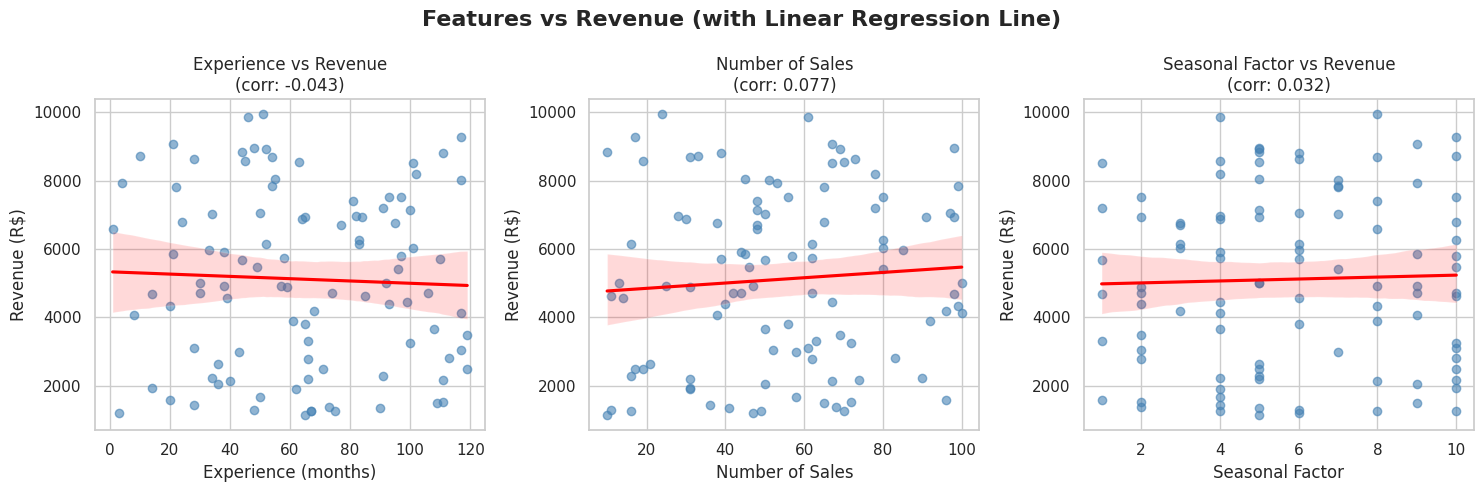

In [16]:
# Adding regression lines helps visualize the "best fit" linear relationship and how
# well (or poorly) a linear model would capture the pattern

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Features vs Revenue (with Linear Regression Line)', fontsize=16, fontweight='bold')

# regplot: Scatter plot + linear regression + confidence interval
# The shaded area shows the 95% confidence interval for the regression line. A wider
# interval = more uncertainty in the relationship

# Experience vs Revenue
sns.regplot(
  data=df, x='years_of_experience', y='revenue_in_reais', ax=axes[0],
  scatter_kws={'alpha': 0.6, 'color': 'steelblue'}, line_kws={'color': 'red'})
axes[0].set_title(f'Experience vs Revenue\n(corr: {df['years_of_experience'].corr(df['revenue_in_reais']):.3f})')
axes[0].set_xlabel('Experience (months)')
axes[0].set_ylabel('Revenue (R$)')

# Number of Sales vs Revenue
sns.regplot(
  data=df, x='number_of_sales', y='revenue_in_reais', ax=axes[1],
  scatter_kws={'alpha': 0.6, 'color': 'steelblue'}, line_kws={'color': 'red'})
axes[1].set_title(f'Number of Sales\n(corr: {df['number_of_sales'].corr(df['revenue_in_reais']):.3f})')
axes[1].set_xlabel('Number of Sales')
axes[1].set_ylabel('Revenue (R$)')

# Seasonal Factor vs Revenue
sns.regplot(
  data=df, x='seasonal_factor', y='revenue_in_reais', ax=axes[2],
  scatter_kws={'alpha': 0.6, 'color': 'steelblue'}, line_kws={'color': 'red'})
axes[2].set_title(f'Seasonal Factor vs Revenue\n(corr: {df['seasonal_factor'].corr(df['revenue_in_reais']):.3f})')
axes[2].set_xlabel('Seasonal Factor')
axes[2].set_ylabel('Revenue (R$)')

plt.tight_layout()
plt.show()


### EDA SUMMARY

In [28]:
# Consolidate all findings from the exploratory analysis

print('='*70)
print('EXPLORATORY DATA ANALYSIS - SUMMARY')
print('='*70)

print('\n DATASET OVERVIEW')
print('-'*40)
print(f'Total samples: {df.shape[0]}')
print(f'Total features: {df.shape[1] - 1}')
print(f'Target variable: revenue_in_reais')
print(f'Missing values: None')
print(f'Outliers: None detected (IQR method)')

print('\n FEATURE STATISTICS')
print('-'*40)
print(f'years_of_experience: {df['years_of_experience'].min()} - {df['years_of_experience'].max()} months')
print(f'number_of_sales: {df['number_of_sales'].min()} - {df['number_of_sales'].max()} sales')
print(f'seasonal_factor: {df['seasonal_factor'].min()} - {df['seasonal_factor'].max()} (scale 1-10)')
print(f'revenue_in_reais: R$ {df['revenue_in_reais'].min():.2f} - R$ {df['revenue_in_reais'].max():.2f}')

print('\n CORRELATIONS WITH TARGET (revenue_in_reais)')
print('-'*40)
correlations = df.corr()['revenue_in_reais'].drop('revenue_in_reais').sort_values(ascending=False)
for feature, corr in correlations.items():
  strength = 'weak' if abs(corr) < 0.3 else 'moderate' if abs(corr) < 0.7 else 'strong'
  print(f'{feature}: {corr:.3f} ({strength})')

print('\n MULTICOLLINEARITY CHECK')
print('-'*40)
print(f'years_of_experience vs number_of_sales: {df['years_of_experience'].corr(df['number_of_sales']):.3f}')
print(f'years_of_experience vs seasonal_factor: {df['years_of_experience'].corr(df['seasonal_factor']):.3f}')
print(f'number_of_sales vs seasonal_factor: {df['number_of_sales'].corr(df['seasonal_factor']):.3f}')
print('No multicollinearity detected (all correlations < 0.7)')

print('\n KEY OBSERVATIONS')
print('-'*40)
print('1. All features shown has WEAK correlation with revenue')
print('2. Scatter plots reveal no clear linear patterns')
print('3. Data appears randomly distributed')
print('4. Linear regression is expected to perform poorly')
print('5. Polynomial regression may capture non-linear patterns')

print('\n'+'='*70)
print('EDA COMPLETE - Ready for modeling')
print('='*70)


EXPLORATORY DATA ANALYSIS - SUMMARY

 DATASET OVERVIEW
----------------------------------------
Total samples: 100
Total features: 3
Target variable: revenue_in_reais
Missing values: None
Outliers: None detected (IQR method)

 FEATURE STATISTICS
----------------------------------------
years_of_experience: 1 - 119 months
number_of_sales: 10 - 100 sales
seasonal_factor: 1 - 10 (scale 1-10)
revenue_in_reais: R$ 1133.36 - R$ 9941.02

 CORRELATIONS WITH TARGET (revenue_in_reais)
----------------------------------------
number_of_sales: 0.077 (weak)
seasonal_factor: 0.032 (weak)
years_of_experience: -0.043 (weak)

 MULTICOLLINEARITY CHECK
----------------------------------------
years_of_experience vs number_of_sales: 0.043
years_of_experience vs seasonal_factor: -0.182
number_of_sales vs seasonal_factor: -0.093
No multicollinearity detected (all correlations < 0.7)

 KEY OBSERVATIONS
----------------------------------------
1. All features shown has WEAK correlation with revenue
2. Scatter